# <font color=#ea5173>Enjoei</font><font color=#583233> Business Analytics Case</font>

## Table of Contents

[1. Information](#1.-Information)

[2. Libraries](#2.-Libraries)

[3. Data](#3.-Data)
    
[4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)

* [4.1 Funnel](#4.1-Funnel)
* [4.2 Orders](#4.2-Orders)

[5. Time series](#5.-Time-series)

* [5.1 Funnel](#5.1-Funnel)
* [5.2 Orders](#5.2-Orders)

## 1. Information
[Return to Table of Contents](#Table-of-Contents)

## 2. Libraries
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import datetime
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot


## 3. Data
[Return to Table of Contents](#Table-of-Contents)

In [2]:
funnel = pd.read_csv("/home/pathilink/Documentos/test/enjoei/enjoei_business_analytics_case/data/funnel.csv")

funnel.sample(5)

,date,visits,product_views,carts_created,orders,orders_value
85,17/04/2020,20597,26033,2771,997,"134180,37"
5,05/06/2020,21564,22694,2428,790,"103369,24"
56,06/06/2020,18155,18747,1997,647,"84377,26"
19,28/04/2020,21456,28887,3036,1084,"141642,4"
28,08/06/2020,22267,24903,2675,857,"108261,32"


In [3]:
orders = pd.read_csv("/home/pathilink/Documentos/test/enjoei/enjoei_business_analytics_case/data/orders.csv")

orders.sample(5)

,order_id,sold_at,seller_id,buyer_id,product_id,shipped_at,order_status,order_value
58649,464785,2020-04-29,380965,258004,213313,2020-05-01,completed,59.98
75894,485811,2020-05-18,949711,663266,612034,2020-05-20,completed,307.35
55292,459335,2020-04-25,2354,728705,197664,2020-04-28,completed,116.81
37251,436752,2020-04-07,387557,504880,509633,2020-04-10,completed,167.73
29013,528991,2020-06-30,4893,614129,311391,2020-07-01,completed,53.10


## 4. Exploratory Data Analysis
[Return to Table of Contents](#Table-of-Contents)

## 4.1 Funnel
[Return to Table of Contents](#Table-of-Contents)

In [5]:
print('The data has {} rows and {} columns.'.format(funnel.shape[0], funnel.shape[1]))

The data has 91 rows and 6 columns.


In [6]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           91 non-null     object
 1   visits         91 non-null     int64 
 2   product_views  91 non-null     int64 
 3   carts_created  91 non-null     int64 
 4   orders         91 non-null     int64 
 5   orders_value   91 non-null     object
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


In [7]:
# transform object into datetime - format 'yyyy-mm-dd'
funnel['date'] = pd.to_datetime(funnel['date'], format='%d/%m/%Y')

# transform object into float
funnel['orders_value'] = pd.to_numeric(funnel['orders_value'].str.replace(',', '.'), errors='coerce').astype(float)

funnel.head()

,date,visits,product_views,carts_created,orders,orders_value
0,2020-04-09,21885,27904,2812,1025,131804.08
1,2020-04-10,20478,26600,2792,1025,135637.38
2,2020-04-01,21650,27702,2778,1032,135037.59
3,2020-04-13,21135,27109,2861,1037,134157.10
4,2020-04-08,21859,28580,2876,1045,133892.66


In [8]:
funnel.describe()

,visits,product_views,carts_created,orders,orders_value
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,20844.648352,24824.054945,2607.032967,891.142857,115354.944615
std,2003.111199,2907.604292,318.403917,135.000294,17556.069907
min,17100.000000,18737.000000,1968.000000,627.000000,82275.680000
25%,18487.000000,22678.500000,2421.000000,803.500000,104429.625000
50%,21650.000000,25124.000000,2634.000000,882.000000,114673.360000
75%,22332.000000,26948.000000,2801.000000,993.000000,128624.980000
max,23544.000000,30577.000000,3310.000000,1198.000000,153729.770000


In [9]:
funnel.astype('object').describe()

,date,visits,product_views,carts_created,orders,orders_value
count,91,91,91,91,91,91.0
unique,91,90,90,88,82,91.0
top,2020-05-03 00:00:00,21650,24962,2729,863,129165.7
freq,1,2,2,2,3,1.0


In [10]:
# 3 months of data

print("Minimum date:", funnel.date.min())
print("Maximum date:", funnel.date.max())

Minimum date: 2020-04-01 00:00:00
Maximum date: 2020-06-30 00:00:00


## 4.2 Orders
[Return to Table of Contents](#Table-of-Contents)

In [14]:
print('The data has {} rows and {} columns.'.format(orders.shape[0], orders.shape[1]))

The data has 100125 rows and 8 columns.


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100125 entries, 0 to 100124
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      100125 non-null  int64  
 1   sold_at       100125 non-null  object 
 2   seller_id     100125 non-null  int64  
 3   buyer_id      100125 non-null  int64  
 4   product_id    100125 non-null  int64  
 5   shipped_at    81094 non-null   object 
 6   order_status  100125 non-null  object 
 7   order_value   100125 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.1+ MB


In [16]:
orders['order_status'].unique()

array(['canceled', 'completed'], dtype=object)

In [17]:
# all null's are canceled orders
orders.query('shipped_at == "[NULL]" & order_status != "canceled"')

,order_id,sold_at,seller_id,buyer_id,product_id,shipped_at,order_status,order_value


## 5. Time series
[Return to Table of Contents](#Table-of-Contents)

In [4]:
def plot_trend(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))
  sns.set_palette('Accent')
  sns.set_style('darkgrid')

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=12, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=12, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=12, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)

## 5.1 Funnel
[Return to Table of Contents](#Table-of-Contents)

In [11]:
# order date column
df_funnel = funnel.sort_values('date').copy()

# add weekday
df_funnel['day_of_week'] = df_funnel['date'].dt.strftime('%a')

df_funnel.head()

,date,visits,product_views,carts_created,orders,orders_value,day_of_week
2,2020-04-01,21650,27702,2778,1032,135037.59,Wed
38,2020-04-02,21686,27883,3049,1127,149464.26,Thu
42,2020-04-03,20300,28215,3082,1135,145831.22,Fri
8,2020-04-04,17100,21092,2159,795,99305.19,Sat
54,2020-04-05,17234,22406,2438,896,115865.05,Sun


## Trends

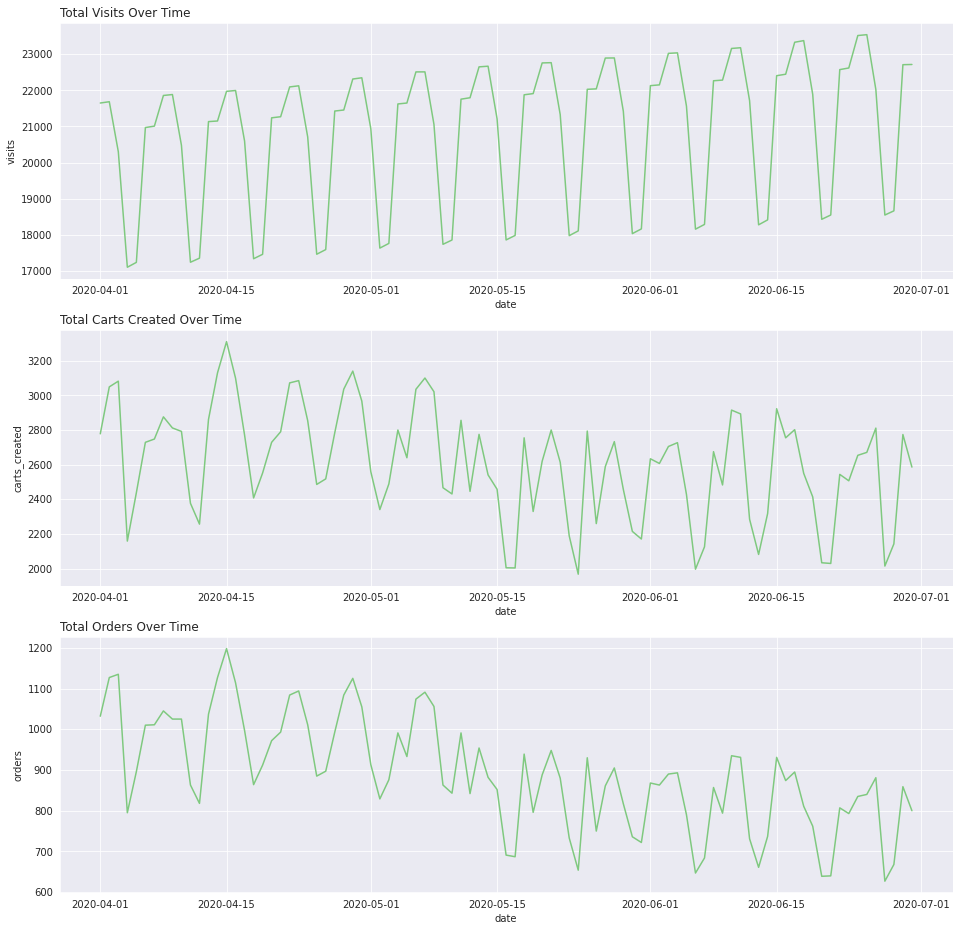

In [12]:
plot_trend(
    'date', 
    'visits', 
    'carts_created', 
    'orders', 
    df_funnel, 
    'Total Visits Over Time', 
    'Total Carts Created Over Time', 
    'Total Orders Over Time'
)

## Decomposing

In [13]:
# Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row).

df_funnel['increase_orders'] = df_funnel['orders'].diff()
df_funnel['acceleration_orders'] = df_funnel['increase_orders'].diff()

df_funnel['increase_orders_value'] = df_funnel['orders_value'].diff()
df_funnel['acceleration_orders_value'] = df_funnel['increase_orders_value'].diff()

df_funnel.head()

,date,visits,product_views,carts_created,orders,orders_value,day_of_week,increase_orders,acceleration_orders,increase_orders_value,acceleration_orders_value
2,2020-04-01,21650,27702,2778,1032,135037.59,Wed,NaN,NaN,NaN,NaN
38,2020-04-02,21686,27883,3049,1127,149464.26,Thu,95.0,NaN,14426.67,NaN
42,2020-04-03,20300,28215,3082,1135,145831.22,Fri,8.0,-87.0,-3633.04,-18059.71
8,2020-04-04,17100,21092,2159,795,99305.19,Sat,-340.0,-348.0,-46526.03,-42892.99
54,2020-04-05,17234,22406,2438,896,115865.05,Sun,101.0,441.0,16559.86,63085.89


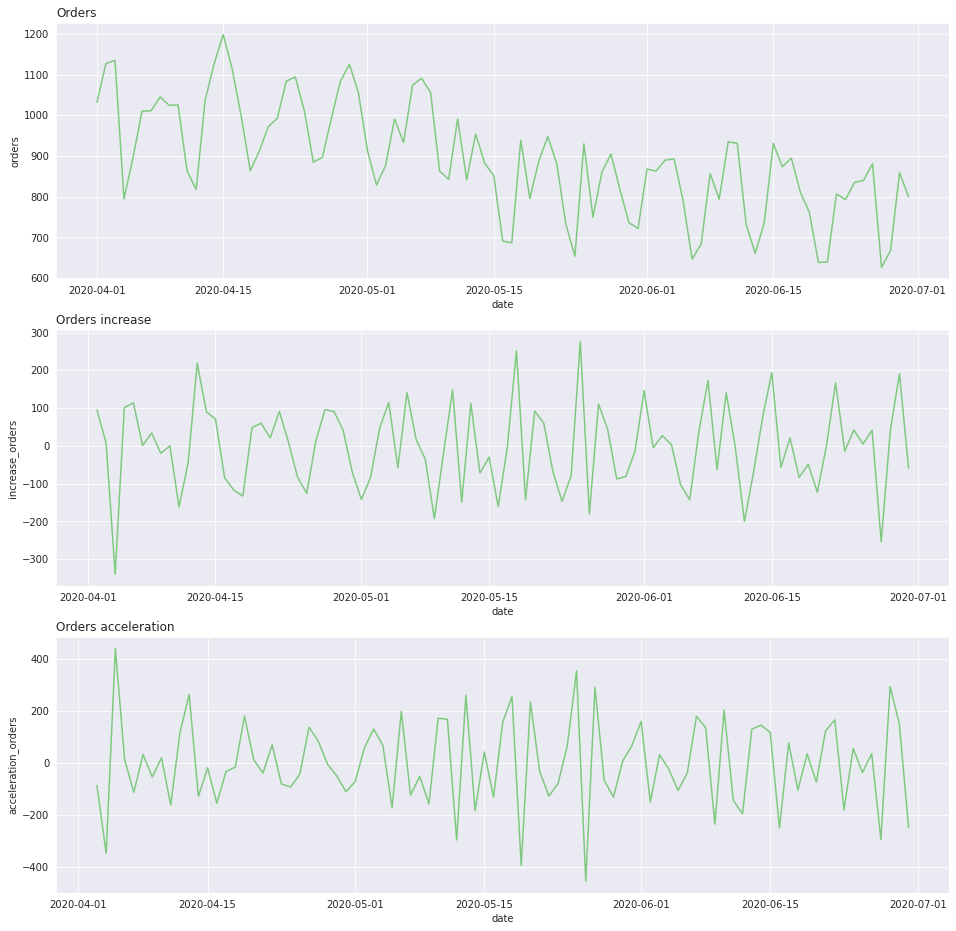

In [18]:
# orders column
plot_trend(
    'date', 
    'orders', 
    'increase_orders', 
    'acceleration_orders', 
    df_funnel, 
    'Orders', 
    'Orders increase', 
    'Orders acceleration'
)

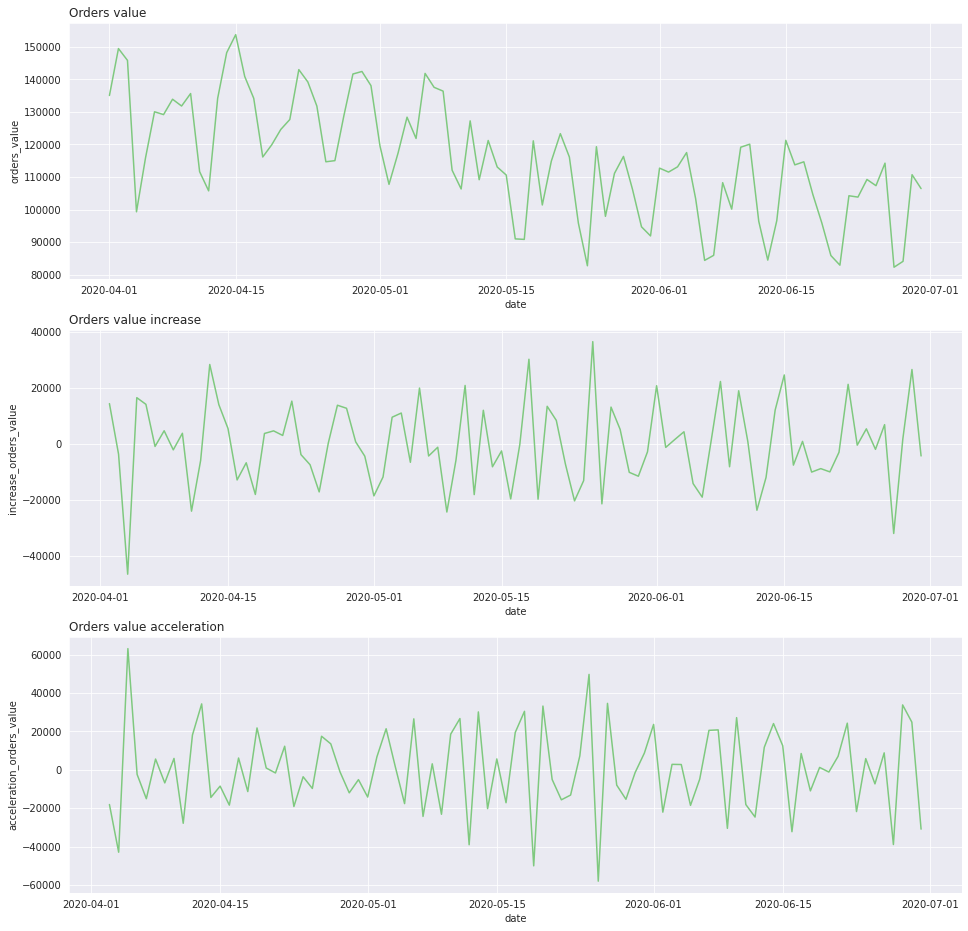

In [19]:
# orders_value column
plot_trend(
    'date', 
    'orders_value', 
    'increase_orders_value', 
    'acceleration_orders_value', 
    df_funnel, 
    'Orders value', 
    'Orders value increase', 
    'Orders value acceleration'
)

## Seasonality

In [25]:
# grouping
grouped_orders = (df_funnel
                  .groupby('day_of_week')[['orders', 'increase_orders', 'acceleration_orders']]
                  .mean()
                  .round()
                  .reset_index()
                  .sort_values('day_of_week')
                 )
# mapping dictionary for the days of the week
day_order = {'Fri': 0, 'Sat': 1, 'Sun': 2, 'Mon': 3, 'Tue': 4, 'Wed': 5, 'Thu': 6}

# new column with the days in order 
grouped_orders['day_of_week_order'] = grouped_orders['day_of_week'].map(day_order)

# sort by the new column
grouped_orders = grouped_orders.sort_values('day_of_week_order').drop('day_of_week_order', axis=1)

grouped_orders

,day_of_week,orders,increase_orders,acceleration_orders
0,Fri,912.0,-67.0,-59.0
2,Sat,756.0,-155.0,-89.0
3,Sun,772.0,15.0,171.0
1,Mon,937.0,165.0,150.0
5,Tue,897.0,-40.0,-206.0
6,Wed,986.0,77.0,116.0
4,Thu,978.0,-8.0,-93.0


In [ ]:
# holidays?

## 5.2 Orders
[Return to Table of Contents](#Table-of-Contents)

# RASCUNHO